In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
import calendar

As always, i import:
* pandas for data manipulation
* matplotlib for visualization 
* fuzzywuzzy for string matching in data
*  calendar for converting month number to month name.

In [23]:
original_vacancy = pd.read_excel("../data/vacancy primary info.xlsx")
original_vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  889 non-null    int64 
 1   Name                889 non-null    object
 2   Url to Vacancy      889 non-null    object
 3   Company             889 non-null    object
 4   Location            870 non-null    object
 5   Type of Employment  889 non-null    object
 6   Age category        44 non-null     object
 7   Education degree    414 non-null    object
 8   Salary              889 non-null    object
 9   Posting Date        882 non-null    object
 10  Deadline Date       882 non-null    object
dtypes: int64(1), object(10)
memory usage: 76.5+ KB


Import my excel file with separated data: 
- In `vacancy primary info` file contains one-line data, such as vacancy name, ID, URL, company, location, etc.
- In `vacancy skills` file contains multi-line data, such as skills and alternative vacancy names.

## Columns in vacancy primary info
* Location - Where is job located 
* Age category - Age requirement
* Posting Date - When vacancy was posted
* Deadline Date - When vacancy will cease to be relevant


Display the number of non-null rows in the DataFrame.
As we can see, only 44 out of 889 vacancies have an age category, and 414 require some education degree.

In [24]:
original_vacancy.head()

,Id,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date
0,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,19.03.2024,19.04.2024
1,2,React Native Developer,https://busy.az/vacancy/122877/react-native-de...,Air Group,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,19.03.2024,03.04.2024
2,3,IOS developer,https://busy.az/vacancy/122830/ios-developer,Bank Respublika ASC,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,19.03.2024,19.04.2024
3,4,iOS Developer (Swift UI),https://busy.az/vacancy/122828/ios-developer-s...,Bank Respublika ASC,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,18.03.2024,18.04.2024
4,5,Baş PL/SQL Developer,https://busy.az/vacancy/122680/bas-plsql-devel...,Ziraat Bank Azərbaycan,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,16.03.2024,16.04.2024


Display the first five rows of data from "vacancy primary info" to get an idea of what data is stored in the columns.

In [25]:
def merge_similar_strings(df, column):
    
    unique_strings = df[column].unique() 
    for string1 in unique_strings:
        for string2 in unique_strings:
            if string1 != string2 and fuzz.ratio(string1, string2) > 90: 
                df[column] = df[column].replace({string2: string1})  
    return df

    """
    Function to merge similar strings in a DataFrame column.

    Parameters:
    - df: DataFrame containing the data.
    - column: Name of the column with strings to be merged.

    Returns:
    - DataFrame with similar strings merged.
    """

In [26]:
def matplotlib_graphic(df,column_name,limit = 0):
    df[column_name] = df[column_name].astype(str)
    df_without_repeat = merge_similar_strings(df, column_name)
    
    if limit == 0: 
        counts =  df_without_repeat[column_name].where(df_without_repeat[column_name] != "nan").dropna().value_counts()
    else:
        counts =  df_without_repeat[column_name].where(df_without_repeat[column_name] != "nan").dropna().value_counts()[:limit]
    return counts

    """
    Function for visualization of the frequency of unique values in a DataFrame column.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column for visualization.
    - limit: Maximum number of unique values to consider. Default is 0 (all unique values).

    Returns:
    - Series with the frequency counts of unique values in the specified column.
    """

In [27]:
drop_same_data = merge_similar_strings(original_vacancy, 'Name')
drop_same_data.describe(include='all').transpose().loc[:, 'top']

Id                                                            NaN
Name                                          Front End Developer
Url to Vacancy        https://busy.az/vacancy/98258/php-developer
Company                                                PASHA Bank
Location                                                     Bakı
Type of Employment                           Tam ştat (full time)
Age category                                             25  - 45
Education degree                                              Ali
Salary                                         Razılaşma yolu ilə
Posting Date                                           03.07.2022
Deadline Date                                          03.08.2022
Name: top, dtype: object

## Let's find out the most common values in each column

* Every Id is unique, so there cannot be a common value.
* The most popular title name is "Front End Developer."
* The company with the most vacancies is "PASHA Bank."
* The age category is between 25 and 45. In that age, most specialists are already in middle-senior positions.
* The type of employment is "Tam ştat (full time).
* The education degree is "Ali" (Bachelor's degree). Most employers want employees with higher education.
* Salary information is mostly not provided.

In [28]:
original_vacancy_skills = pd.read_excel("../data/vacancy skills.xlsx")
original_vacancy_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  4572 non-null   int64 
 1   Skills              4498 non-null   object
 2   Vacancy Alter Name  4570 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.3+ KB


The DataFrame contains information about job skills.

In [29]:
original_vacancy_skills.head()

,Id,Skills,Vacancy Alter Name
0,1,JavaScript,proqramçı
1,1,Figma,programmer
2,1,software development,software developer
3,1,programming,proqram təminatçısı
4,2,software development,mobile application developer


Display the first five rows of data from the `vacancy skills` DataFrame.

In [30]:
top_values_filtered = original_vacancy_skills.describe(include='all').transpose().loc[:, 'top']
top_values_filtered

Id                                     NaN
Skills                software development
Vacancy Alter Name      software developer
Name: top, dtype: object

 The most common skill is `Software development` which is logical. However, we want to see the most popular skill excluding terms like `software development` or `programming`.
 So, I created an array with these common skills.

In [31]:
tags_to_remove = ["software development","software developer","proqramlaşdırma", "programming", "программирование","proqram təminatı"]
skills = original_vacancy_skills['Skills'].astype(str)
skills = skills[~skills.isin(tags_to_remove)]
skills.mode().iloc[0]

'HTML'

The most common skill in job postings is `HTML`, which is not surprising since Front-end, FullStack, and sometimes even Back-end roles require knowledge of HTML for portfolio projects.

In [32]:
vacancy_df = pd.DataFrame(original_vacancy)
skills_df = pd.DataFrame(original_vacancy_skills)
merged_df = pd.merge(vacancy_df, skills_df, on='Id')
merged_df[['Posting Date', 'Deadline Date']] = merged_df[['Posting Date', 'Deadline Date']].apply(pd.to_datetime, dayfirst=True)
merged_df['Location'] = merged_df['Location']

merged_df

,Id,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Posting Date,Deadline Date,Skills,Vacancy Alter Name
0,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,JavaScript,proqramçı
1,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,Figma,programmer
2,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,software development,software developer
3,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,programming,proqram təminatçısı
4,2,React Native Developer,https://busy.az/vacancy/122877/react-native-de...,Air Group,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-03-19,2024-04-03,software development,mobile application developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,software development,proqramçı
4568,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,proqram təminatı,software developer
4569,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,proqramlaşdırma,proqram təminatçısı
4570,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,программирование,NaN


 Merged (joined) two DataFrames for better visualization and understanding.

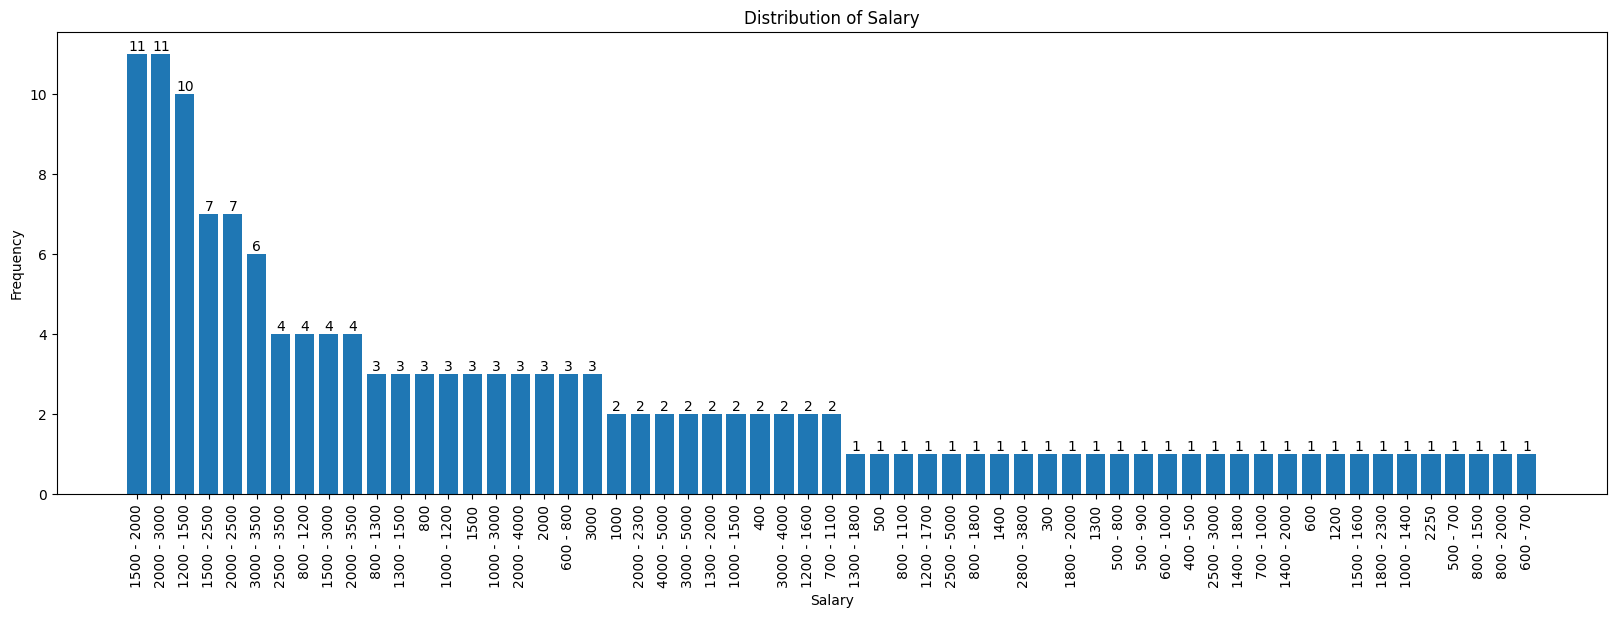

In [33]:
salary_counts =  original_vacancy['Salary'].where(original_vacancy['Salary'] != 'Razılaşma yolu ilə').value_counts()

plt.figure(figsize=(20,6))
plt.bar(salary_counts.index, salary_counts.values)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.xticks(rotation=90)

for i, count in enumerate(salary_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

The first visualization is salary, perhaps the most important aspect of a job. I removed all entries with "Razılaşma yolu ilə" and kept only numerical values.

* In the first place, we see `1500-2000₼`, which represents a salary for new middle-level employees.
* The second most common range is `2000-3000₼`, indicating a strong middle to new senior level.
* Third place is `1200-1500₼`, which I assume is for strong junior positions.
* Fourth place is `2000-2500₼`, representing a strong middle-level salary.
* The fifth most common range is `3000-3500₼`, indicating senior-level positions.
* The minimum salary observed is `300₼`, while the maximum is in the `4000-5000₼` range.

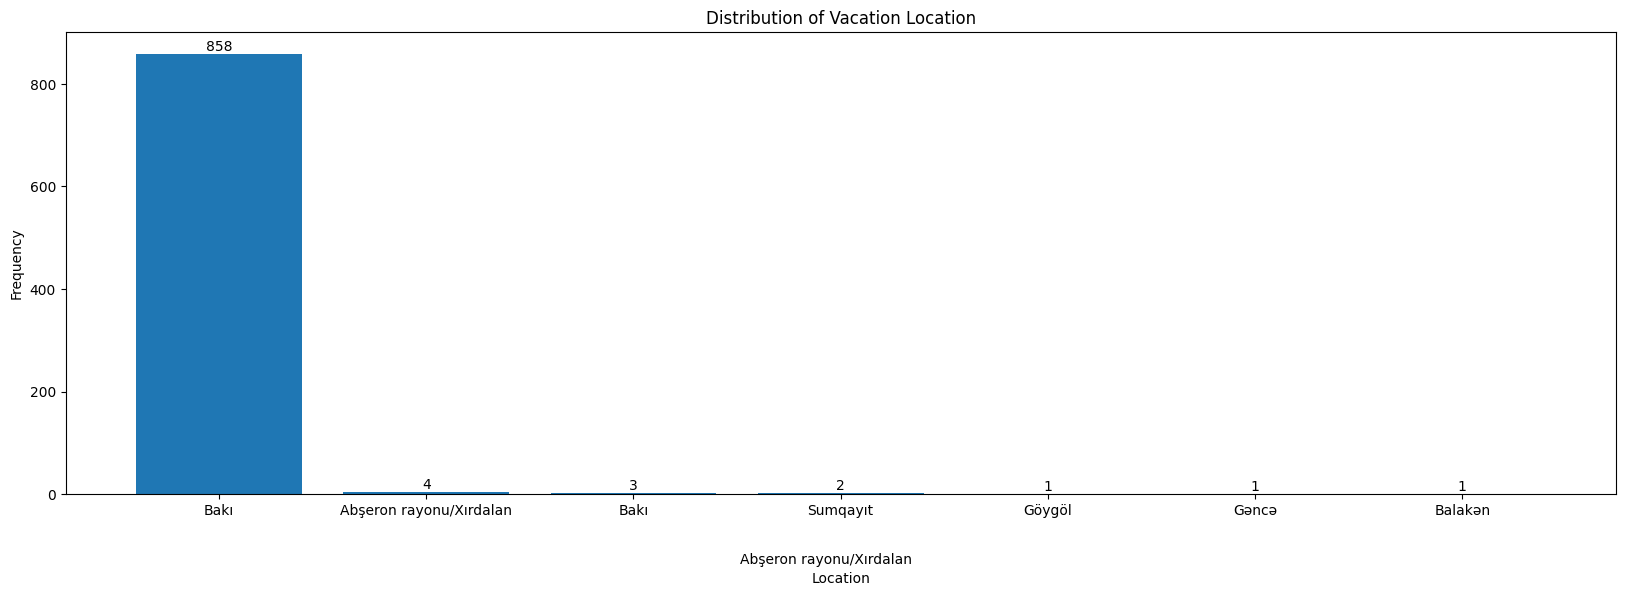

In [34]:
location_counts = matplotlib_graphic(original_vacancy,'Location')

plt.figure(figsize=(20,6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Distribution of Vacation Location')

for i, count in enumerate(location_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

 Job location is predominantly `Baki`, the capital and largest city of Azerbaijan.
 Only 12 out of 889 vacancies are located outside Baki.

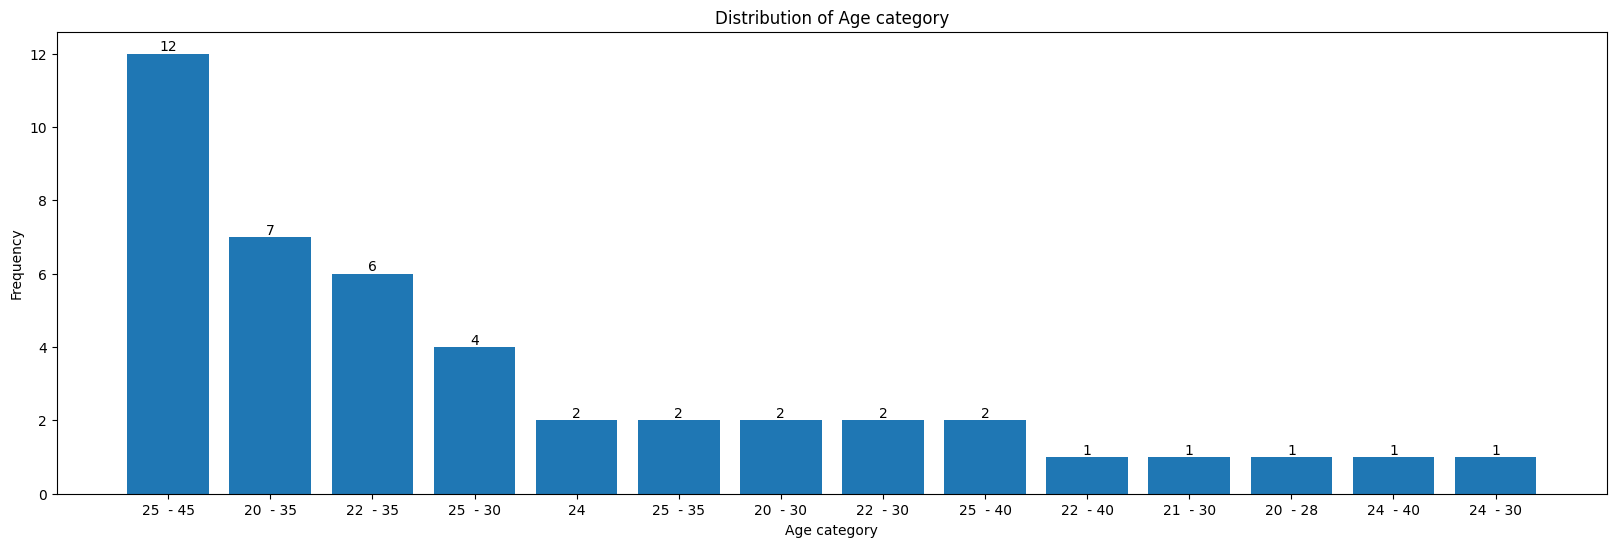

In [35]:
age_category_count =  original_vacancy['Age category'].dropna().value_counts()

plt.figure(figsize=(20,6))
plt.bar(age_category_count.index, age_category_count.values)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Distribution of Age category')

for i, count in enumerate(age_category_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

# The next statistics visualization is age category.
* The most common age category is `25-45`, which is ideal for young employees with experience. 
* The second most common is `20-35`, indicating a high proportion of juniors within this age range.
* The third is `22-35`, which is slightly older than the second.
* Fourth place is `25-30`.
* The most popular age range is between `20-25`.
* The least in demand age category is `40` and above.

There is limited data because many employers do not specify age requirements.

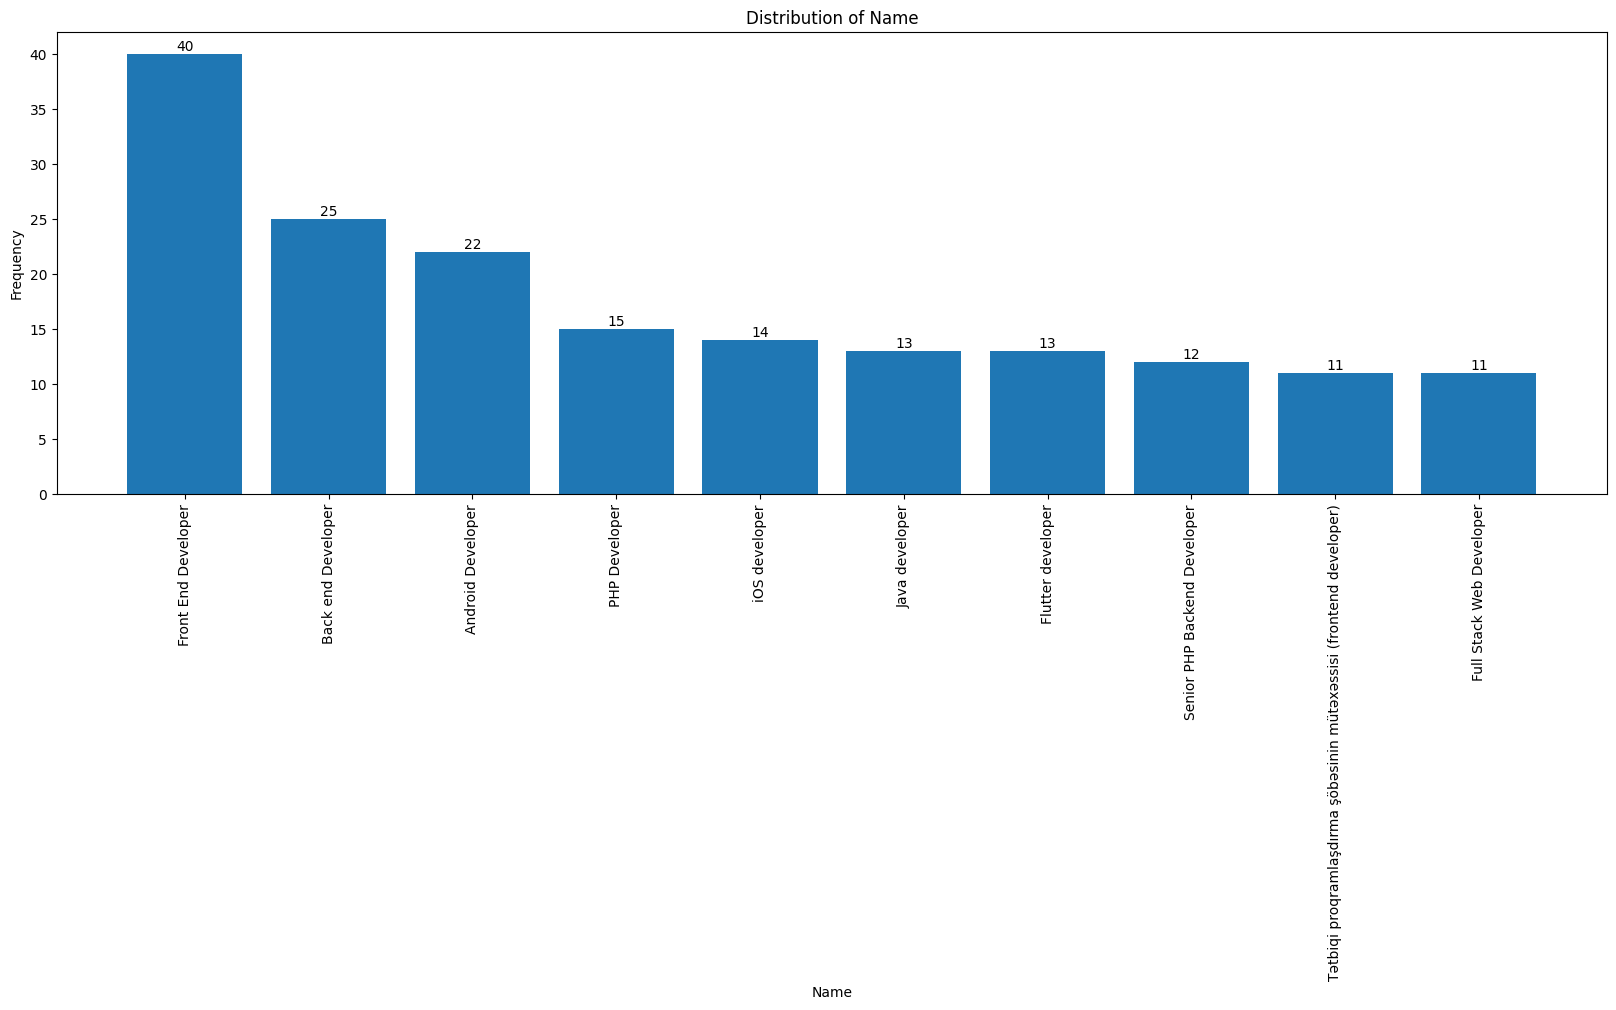

In [36]:
vacancy_name_count = matplotlib_graphic(original_vacancy,'Name',10)

plt.figure(figsize=(20,6))
plt.bar(vacancy_name_count.index, vacancy_name_count.values)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.title('Distribution of Name')
plt.xticks(rotation= 90 ,fontsize=10)

for i, count in enumerate(vacancy_name_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

Name(Title) statistics
Top 3 titles are generalized, making it difficult to discern specific programming requirements.
* First place - Front-end developer
* Second place - Back-end developer
* Third place - Android developer
* In fourth place, we see `PHP Developer`, indicating a more specific requirement.
* In fifth place, we have the generalized title `iOS developer`. iOS is the second most popular mobile operating system, hence the demand for iOS development skills.
* In the sixth place, we have `Java`. Its popularity can be attributed to its cross-platform compatibility and widespread use in enterprise-level applications.
* In the seventh place, we have `Flutter`, which is a relatively new technology gaining traction in the industry, reflecting emerging job opportunities.
In general, we can observe that `PHP` is the most popular language in vacancy titles.


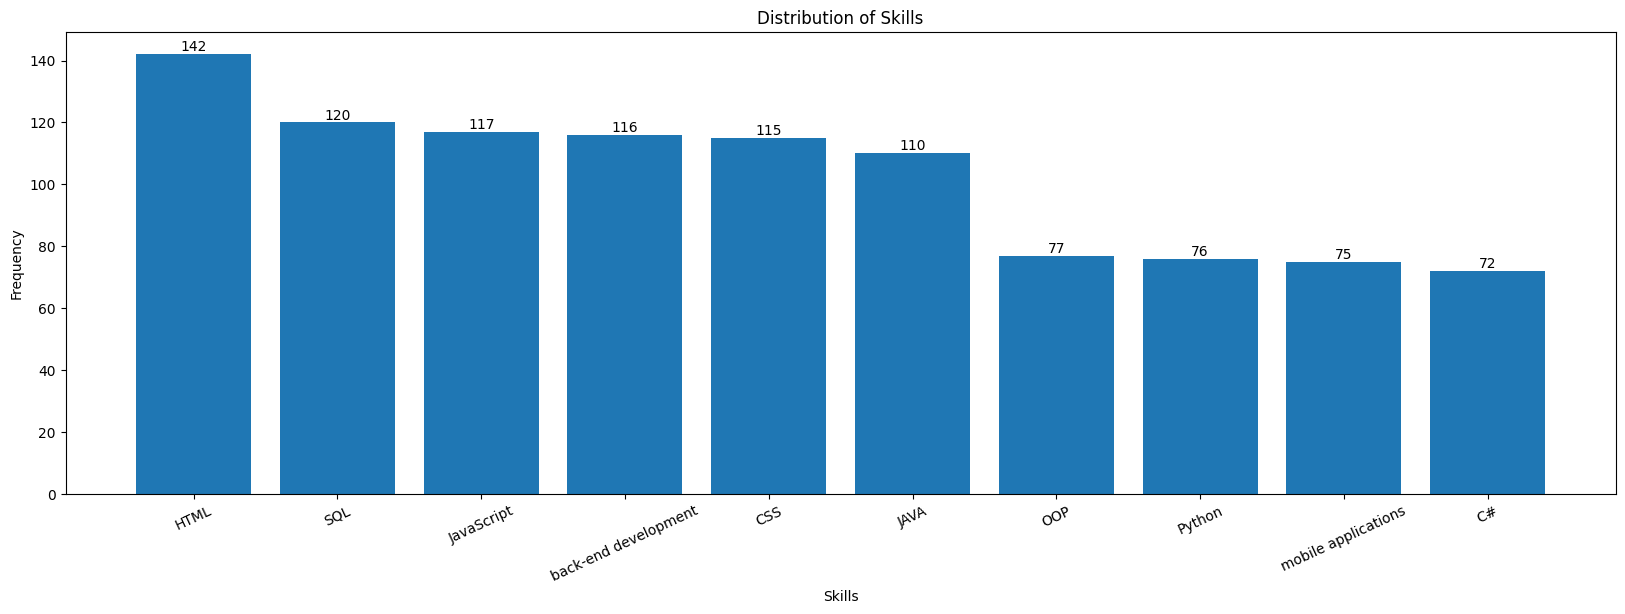

In [37]:
tags_count = matplotlib_graphic(merged_df, 'Skills', 15)
tags_count = tags_count[~tags_count.index.isin(tags_to_remove)]

plt.figure(figsize=(20, 6))
plt.bar(tags_count.index, tags_count.values)
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Distribution of Skills')
plt.xticks(rotation=25, fontsize=10)

for i, count in enumerate(tags_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

## The most important data for me is skills.
* We already know the most popular skill - `HTML`.
* Second place is `SQL`. All back-end and full-stack developers must know SQL for data storage.
* `JavaScript` is the most popular programming language due to its versatility, being used for both back-end and front-end development.
* `Back-end development` is a general skill, indicating proficiency in at least one back-end programming language (`Python`, `C#`, `Java`, etc.), SQL or NoSQL databases, and more.
* `CSS` is a markup language essential for styling websites.
* `Java` is the second most popular back-end language due to its cross-platform compatibility.
* `OOP` is a programming paradigm, with many popular languages such as `Java`, `C#`, and `C++` adhering to it.
* `Python` is the language used to write these codes, known for its flexibility and extensive libraries.
* `Mobile applications` is another general skill required in various development roles.
* `C#` is a back-end programming language similar to `Java`, forming a part of the `.NET` framework with its own libraries.


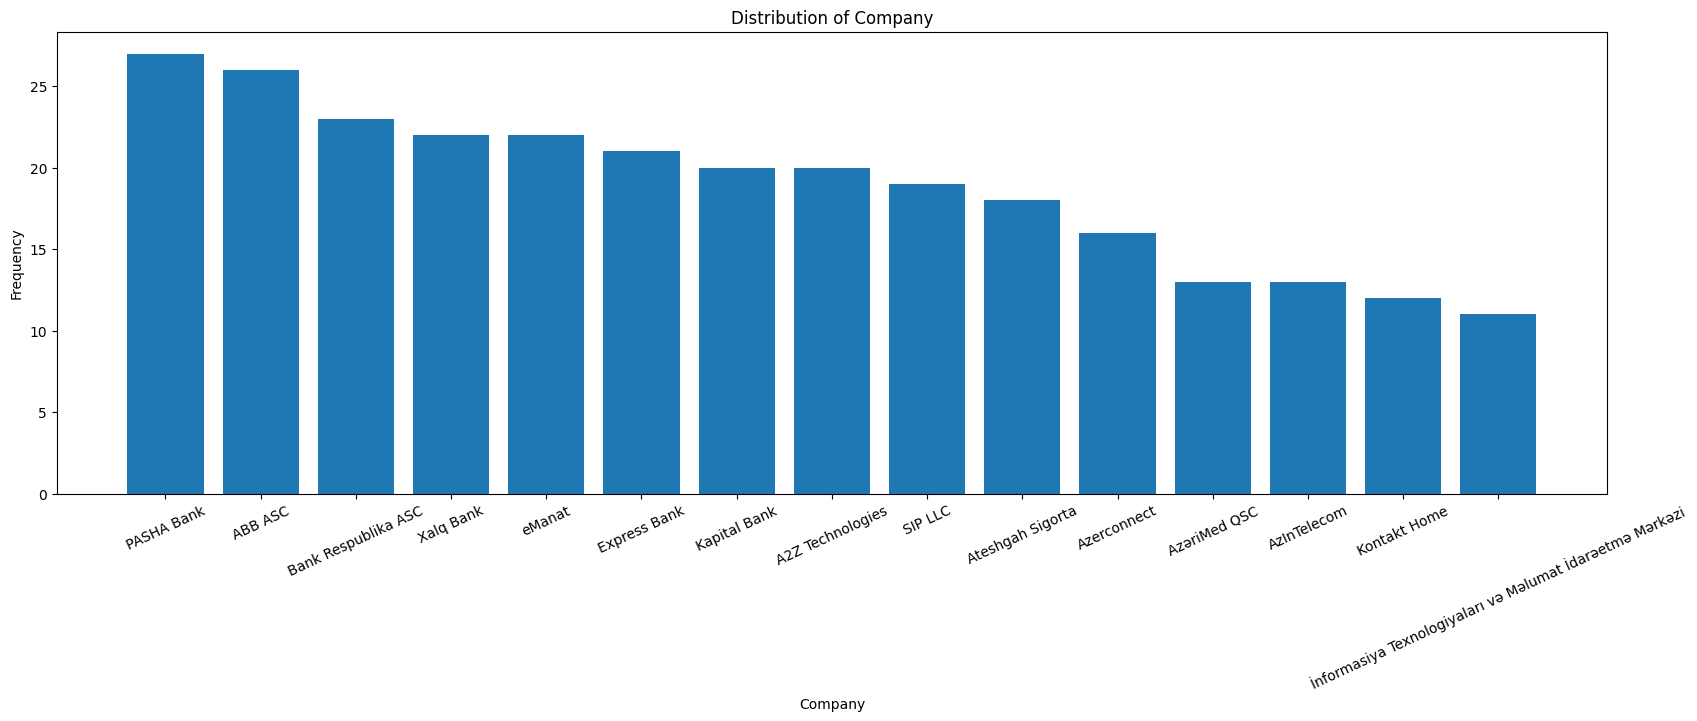

In [38]:
company_count = matplotlib_graphic(original_vacancy, 'Company',15)

plt.figure(figsize=(20, 6))
plt.bar(company_count.index, company_count.values)
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Distribution of Company')
plt.xticks(rotation=25, fontsize=10)
    
plt.show()

In [39]:
plt.show()
merge_df_without_repeat = merge_similar_strings(merged_df, 'Skills')
merge_df_without_repeat = merge_df_without_repeat[~merge_df_without_repeat['Skills'].isin(tags_to_remove)].where(
    merge_df_without_repeat != "nan")

grouped_data = merge_df_without_repeat.groupby(['Name', 'Skills']).size().reset_index(name='Tag Count').apply(list)
grouped_data_sorted = grouped_data.sort_values(by='Tag Count', ascending=False)[:15]
grouped_data_sorted

,Name,Skills,Tag Count
448,Front End Developer,SQL,7
436,Front End Developer,HTML,6
451,Front End Developer,back-end development,6
47,Android Developer,JavaScript,5
912,Middle Backend .NET Developer,HTML,5
162,Back end Developer,mobile applications,5
359,Devops engineer,HTML,5
914,Middle Backend .NET Developer,JavaScript,5
432,Front End Developer,C#,5
1590,Senior PHP Backend Developer,CSS,4


Unfortunately, I cannot visualize this table as a plot, but I believe it provides a clearer understanding.
`HTML` remains on the top as usual. Even DevOps engineers require knowledge of HTML.
(Note: DevOps engineers need to understand HTML to effectively manage web infrastructure and collaborate with developers and other team members.)


In [40]:
merge_df_filtered = merge_df_without_repeat[~merge_df_without_repeat['Skills'].isin(tags_to_remove)].where(
    merge_df_without_repeat != "nan")

the_20_most_popular_tags_by_company = (merge_df_filtered
                                       .groupby(['Company', 'Skills'])
                                       .size()
                                       .reset_index(name='Tag Count')
                                       .sort_values(by='Tag Count', ascending=[False])
                                       .groupby('Company')
                                       .head(2))[:20]

the_20_most_popular_tags_by_company

,Company,Skills,Tag Count
1616,eManat,HTML,7
1146,PASHA Bank,HTML,7
1143,PASHA Bank,CSS,7
904,Kapital Bank,mobile applications,7
1532,Xalq Bank,HTML,6
47,A2Z Technologies,mobile applications,6
387,Bank Respublika ASC,CSS,6
1535,Xalq Bank,JavaScript,5
46,A2Z Technologies,mobile application development,5
1615,eManat,CSS,5


1. Most in-demand skills by companies: Describe which specific skills are most frequently required by different companies. For example:
    * `eManat` and `PASHA Bank` often require expertise in HTML and CSS, indicating a need for web developers or designers."
    * `Kapital Bank` and `A2Z Technologies` focus on mobile application skills, suggesting their interest in mobile app development."
2. Trends in required skills: Highlight recurring skills and draw conclusions about which technologies or development areas are most sought after. For instance:
    * `HTML` and `CSS` are consistently sought after by various banks, indicating the importance of front-end web development skills in the financial sector."
    * The emphasis on mobile application development skills by `Kapital Bank` and `A2Z Technologies` reflects the growing demand for mobile-first solutions in the industry."

Text(0.5, 1.0, 'Top 25 Posting Vacancy Count')

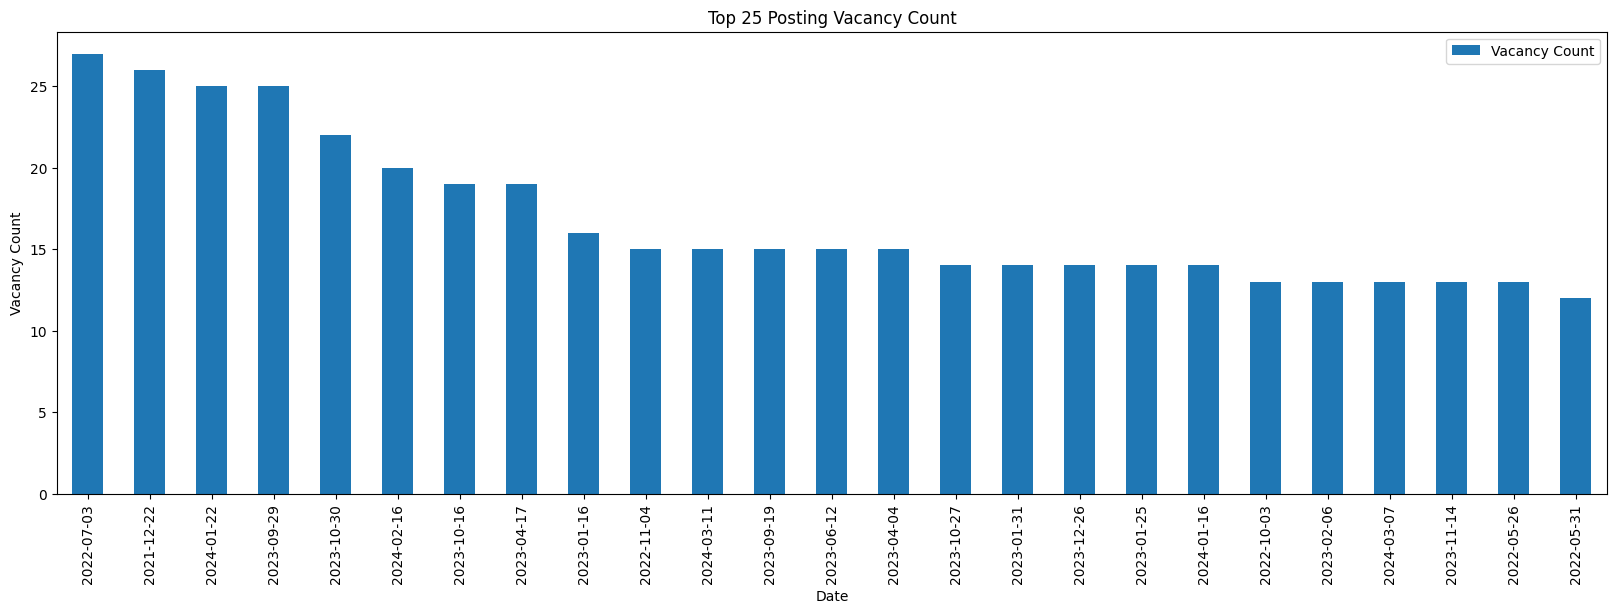

In [41]:
df_sorted_by_post_date = (merge_df_filtered
                                .groupby(['Posting Date'])
                                .size()
                                .reset_index(name='Vacancy Count')
                                .sort_values(by='Vacancy Count', ascending=[False]))[:25]

df_sorted_by_post_date['Short Date'] = pd.DataFrame(df_sorted_by_post_date)['Posting Date'].dt.strftime('%Y-%m-%d')

df_sorted_by_post_date.plot(kind="bar", x="Short Date", y="Vacancy Count", figsize=(20,6))
plt.xlabel("Date")
plt.ylabel("Vacancy Count")
plt.title("Top 25 Posting Vacancy Count")

<Axes: xlabel='Month'>

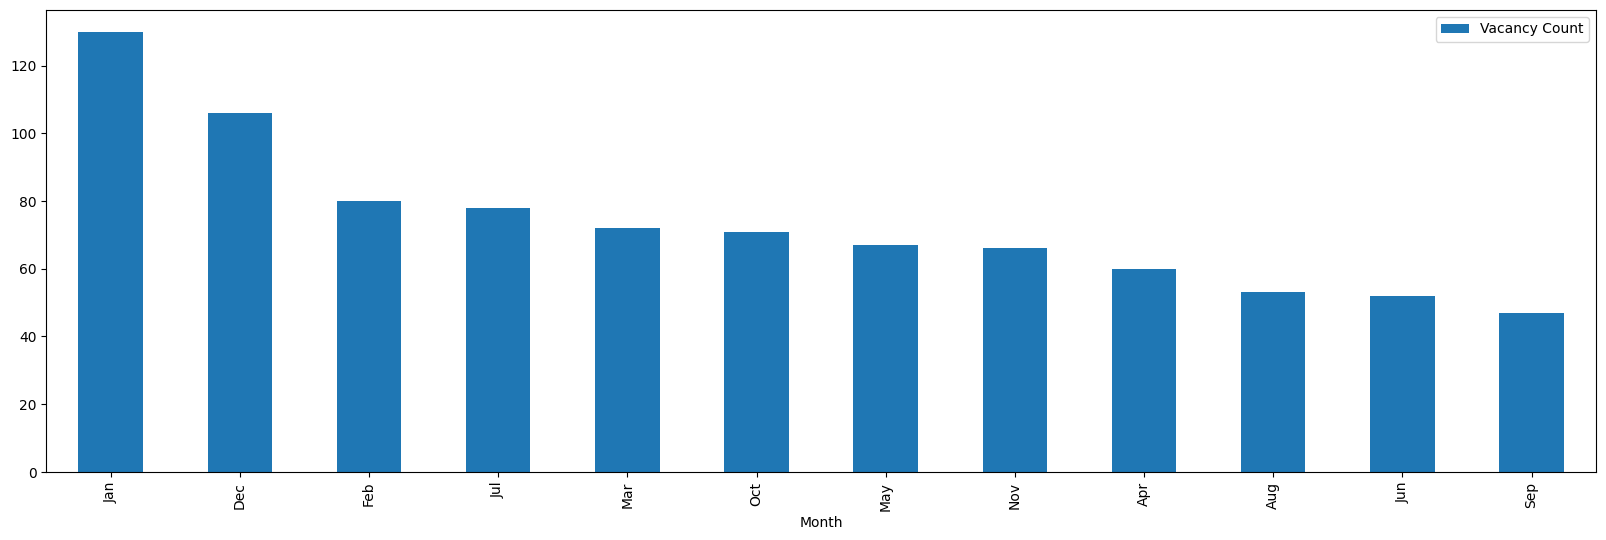

In [42]:
original_vacancy["Posting Date"] = pd.to_datetime(original_vacancy["Posting Date"], dayfirst=True)
original_vacancy["Month"] = original_vacancy["Posting Date"].dt.strftime('%m')

df_sorted_by_time = (original_vacancy
                     .groupby(['Month'])
                     .size()
                     .reset_index(name='Vacancy Count')
                     .sort_values(by='Vacancy Count', ascending=False))

df_sorted_by_time["Month"] = df_sorted_by_time["Month"].apply(lambda x: calendar.month_abbr[int(x)])
df_sorted_by_time.plot(kind="bar", x="Month", y="Vacancy Count", figsize=(20, 6))

# Vacancy count by month
The highest number of new vacancies is observed in January, suggesting significant changes occurring after December/January. Possible reasons for this surge include:
* Employees seeking new opportunities at the beginning of the year.
* Companies restructuring their teams or expanding their workforce.
* Contracts reaching their expiration dates.
* Completion of projects, leading to the need for new hires to start new projects.